In [1]:
import collections
import inspect
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog
from graphiclog import utils, io, defaults

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/ross/code/python/projects/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

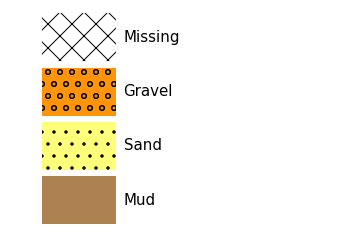

In [3]:
graphiclog.defaults.litholegend.plot()

# Load All Sequences

Here's a function (modified from `depstrat.data`) to load all the sequences as `BedSequence`s: 

In [4]:
# Set up some default args:

FPATH = '../data/AllBedsWithProfiles_CLEAN.csv'

# Columns to convert from strings to arrays
transforms = {c : utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}


# binary indicators
BINARY_FEATURES = ['snd', 'shl']


# bed data columns
FLOAT_FEATURES = [
    'th',
    'gs_tops_psi',
    'mean_gs_psi',
    'max_gs_psi',
    'grain_size_psi',
    'depth_m'
]

FEATURES = BINARY_FEATURES + FLOAT_FEATURES


# Sequence-level metadata
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum']


# Lithology component map
COMPONENT_MAP = ('max_gs_psi', lambda gs: defaults.gs2litho(gs, units='psi'))

In [5]:
def load_sequences(
    fpath=FPATH,
    resample=None,
    depth_col='depth_m',
    features=FEATURES,
    metacols=METACOLS,
    min_length=3
):
    """
    Load the dataset from saved csv. Return list of BedSequences.
    """
    df = pd.read_csv(fpath, converters=transforms)

    bed_seqs = []
    for name, grp in df.groupby('count'):
        seq = graphiclog.BedSequence.from_dataframe(
                grp,
                topcol='tops',
                basecol='bases',
                component_map=COMPONENT_MAP,
                datacols=features,
                metacols=metacols
        )
        if len(seq) >= min_length:
            bed_seqs.append(seq)

    # resample arrays if you want
    for seq in bed_seqs:
        if resample is not None:
            seq.resample_data(depth_col, resample)

    return bed_seqs

In [6]:
sequences = load_sequences()

# Check out a sequence

In [7]:
seq = random.choice(sequences)

seq

Striplog(522 Intervals, start=0.0, stop=118.32348342183599)

In [8]:
seq.metadata

{'name': 'vaca1',
 'count': 454,
 'collection': 'Tres Pasos',
 'eod': 'slopechannel',
 'eodnum': 2}

In [9]:
# The first bed
seq[0]

Interval({'data': {'snd': 1.0, 'shl': -0.0, 'th': 0.5228030386838329, 'gs_tops_psi': -2.0785, 'mean_gs_psi': -1.8541, 'max_gs_psi': -1.8371, 'grain_size_psi': array([-2.0783, -2.0297, -1.9236, -1.8836, -1.8505, -1.837 , -1.837 ]), 'depth_m': array([118.3235, 118.3175, 118.3138, 118.2698, 118.2148, 117.813 ,
       117.8007])}, 'top': Position({'middle': 118.32348342183599, 'units': 'm'}), 'base': Position({'middle': 117.80068038315216, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]})

In [10]:
seq[0].primary.lithology

'sand'

In [11]:
seq.net_to_gross

0.8585672641231835

In [12]:
seq.amalgamation_ratio

0.2596401028277635

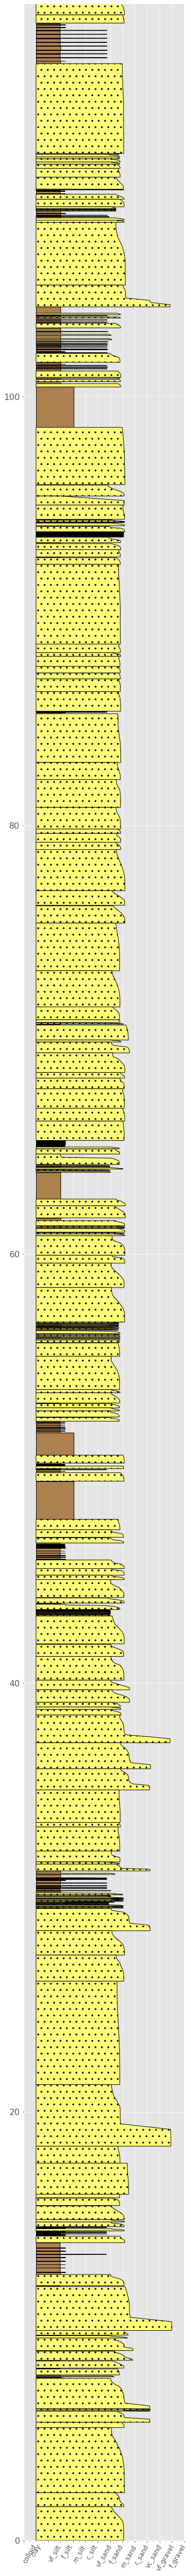

In [13]:
seq.plot(legend=defaults.litholegend, width_field='grain_size_psi', fig_width=7)